In [1]:
import matplotlib.pyplot as plt

In [ ]:
19.70
22.20
22.80
25.00
22.90
21.70
19.90
21.40
21.00

Dual No CDA
Faced 22.21 std 1.45
chance 14.30

SEED_V No CDA 5 class

chance 20

In [5]:
acc_noalign = [38.47960662841797,
38.731971740722656,
35.08726119995117,
33.77593994140625,
30.231203079223633,
37.80696105957031,
31.94339370727539,
36.055946350097656]
import numpy as np
acc_mean_noalign = np.mean(acc_noalign)
acc_std_noalign = np.std(acc_noalign)
print(f'{acc_mean_noalign}±{acc_std_noalign}')

35.26403546333313±2.916800779182613


In [1]:
acc_align = [37.29155731201172,
38.833885192871094,
34.59320831298828,
36.66550064086914,
31.53864097595215,
38.607730865478516,
36.03362274169922,
36.71306228637695]
import numpy as np
acc_mean_align = np.mean(acc_align)
acc_std_align = np.std(acc_align)
print(f'{acc_mean_align}±{acc_std_align}')

36.284651041030884±2.1990436196839864


### train 9 val 1 loo:

pretrain me: 49.21±8.12

DE: 57.72±14.24


### small group finetune 4=1:3

pre model me: 46.33±3.21

finetuned: 47.88±3.20

DE：44.01±4.55

### small group finetune 8=1:7

pre model me: 42.35±2.14

finetuned: 38.92±4.35

DE：40.53±3.81



用更少样本微调（1:7）时，验证集上协方差对齐损失下降更快

### 被试内迁移(无lds)

2:8

DE: 68.04±8.02

pre model me: 45.30±4.78

finetuned: 

8:2

DE: 79.58±8.65

pre model me: 60.00±7.48

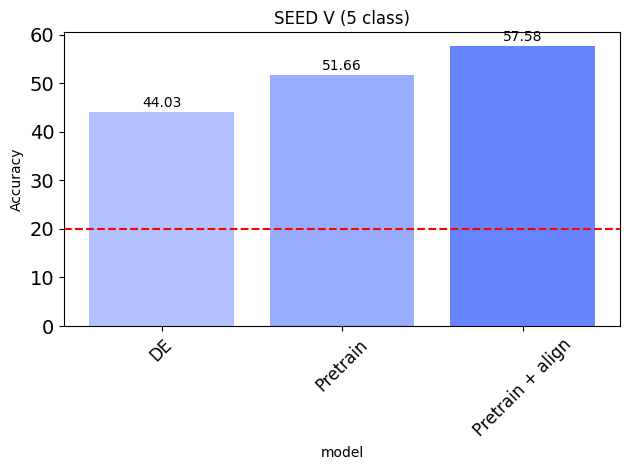

In [24]:
import matplotlib.pyplot as plt

# 数据
x = ['DE', 'Pretrain', 'Pretrain + align']
y = [44.03, 51.66, 57.58]
colors = [(.0, .2, 1, 0.3), (.0, .2, 1, 0.4), (.0, .2, 1, 0.6)]

# 创建柱状图
bars = plt.bar(x, y, color=colors)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=14)
# plt.figure(figsize=(5, 6))

# 设置x轴标签倾斜45度
plt.xticks(rotation=45)

# 绘制红色虚线水平线，y值为20
plt.axhline(y=20, color='r', linestyle='--')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # 位置
             f'{height}', ha='center', va='bottom', fontsize=10)  # 显示数值

# 设置标题和标签
plt.title('SEED V (5 class)')
plt.xlabel('model')
plt.ylabel('Accuracy')

# 显示图形
plt.tight_layout()  # 防止标签被遮挡
plt.show()


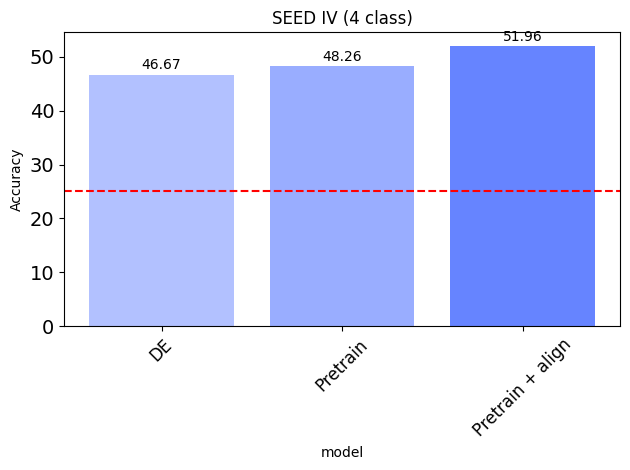

In [26]:
import matplotlib.pyplot as plt

# 数据
x = ['DE', 'Pretrain', 'Pretrain + align']
y = [46.67, 48.26, 51.96]
colors = [(.0, .2, 1, 0.3), (.0, .2, 1, 0.4), (.0, .2, 1, 0.6)]

# 创建柱状图
bars = plt.bar(x, y, color=colors)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=14)
# plt.figure(figsize=(5, 6))

# 设置x轴标签倾斜45度
plt.xticks(rotation=45)

# 绘制红色虚线水平线，y值为20
plt.axhline(y=25, color='r', linestyle='--')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # 位置
             f'{height}', ha='center', va='bottom', fontsize=10)  # 显示数值

# 设置标题和标签
plt.title('SEED IV (4 class)')
plt.xlabel('model')
plt.ylabel('Accuracy')

# 显示图形
plt.tight_layout()  # 防止标签被遮挡
plt.show()

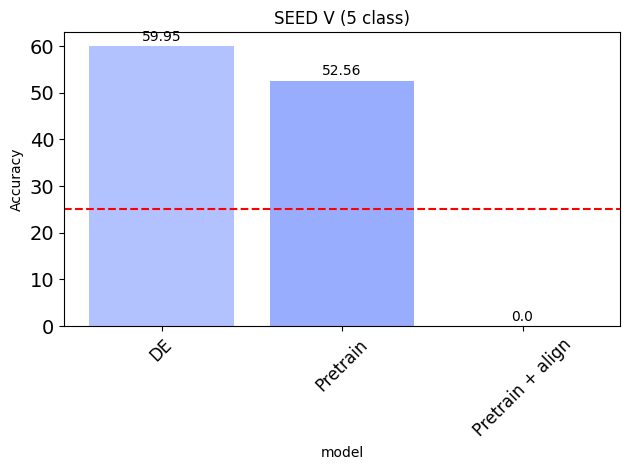

In [27]:
import matplotlib.pyplot as plt

# 数据
x = ['DE', 'Pretrain', 'Pretrain + align']
y = [59.95, 52.56, 0]
colors = [(.0, .2, 1, 0.3), (.0, .2, 1, 0.4), (.0, .2, 1, 0.6)]

# 创建柱状图
bars = plt.bar(x, y, color=colors)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=14)
# plt.figure(figsize=(5, 6))

# 设置x轴标签倾斜45度
plt.xticks(rotation=45)

# 绘制红色虚线水平线，y值为20
plt.axhline(y=25, color='r', linestyle='--')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # 位置
             f'{height}', ha='center', va='bottom', fontsize=10)  # 显示数值

# 设置标题和标签
plt.title('SEED V (5 class)')
plt.xlabel('model')
plt.ylabel('Accuracy')

# 显示图形
plt.tight_layout()  # 防止标签被遮挡
plt.show()

In [37]:
import random

def generate_train_val_sets(n_sub, n_fold, k_sample):
    # 每次折叠的验证集大小
    fold_size = n_sub // n_fold
    subsets = list(range(n_sub))  # 所有子集的索引
    result = []
    for _ in range(k_sample):
        # 随机选择n_fold个验证集的索引
        random.shuffle(subsets)  # 打乱顺序
        for i in range(n_fold):
            # 验证集为当前fold的元素，训练集为其他元素
            val_sub = subsets[i * fold_size : (i + 1) * fold_size]
            train_sub = [x for x in subsets if x not in val_sub]
            result.append(val_sub)
    return result

In [39]:
generate_train_val_sets(15, 4, 3)

[[5, 6, 4],
 [10, 8, 14],
 [1, 3, 11],
 [2, 7, 0],
 [4, 13, 1],
 [14, 11, 12],
 [10, 3, 9],
 [7, 0, 6],
 [14, 7, 11],
 [6, 9, 12],
 [2, 3, 8],
 [13, 1, 10]]